In [3]:
import tensorflow as tf

In [4]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [5]:
tf.random.set_seed(1)
np.random.seed(1)

In [6]:
X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )

In [7]:
X.shape

(200, 2)

In [8]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [9]:
y = np.ones(   len(X)    ) 

In [10]:
y.shape

(200,)

In [11]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
y[  X[:, 0] * X[:, 1] < 0   ] = 0

In [13]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [14]:
print(y.shape)
print(X.shape)

(200,)
(200, 2)


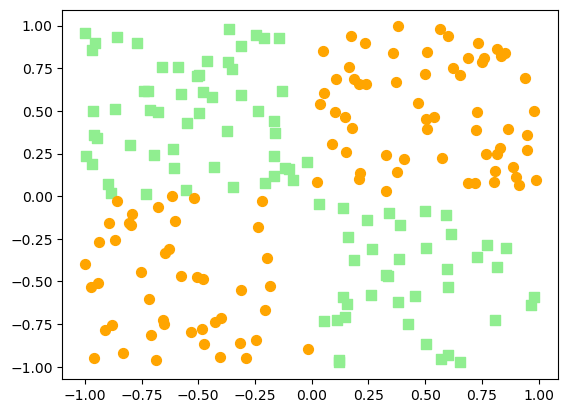

In [15]:
plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()

In [16]:
X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]

logistic regression

In [17]:
model = tf.keras.Sequential()
model.add(
             tf.keras.layers.Dense(
                                      units=1,
                                      input_shape=(2, ),
                                      activation='sigmoid'
                                  )

)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
                 optimizer=tf.keras.optimizers.SGD(),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]

             )

In [20]:
history = model.fit(
                       X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       epochs=200,
                       batch_size=2,
                       verbose=1
                   )

Epoch 1/200
50/50 [==============================] - 4s 10ms/step - loss: 0.8157 - binary_accuracy: 0.4600 - val_loss: 0.8071 - val_binary_accuracy: 0.4800
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.8068 - binary_accuracy: 0.4600 - val_loss: 0.7986 - val_binary_accuracy: 0.4800
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7984 - binary_accuracy: 0.4500 - val_loss: 0.7906 - val_binary_accuracy: 0.4800
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7905 - binary_accuracy: 0.4600 - val_loss: 0.7830 - val_binary_accuracy: 0.4800
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7832 - binary_accuracy: 0.4500 - val_loss: 0.7760 - val_binary_accuracy: 0.4900
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7762 - binary_accuracy: 0.4500 - val_loss: 0.7693 - val_binary_accuracy: 0.4900
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - lo

50/50 [==============================] - 0s 3ms/step - loss: 0.6879 - binary_accuracy: 0.5100 - val_loss: 0.6818 - val_binary_accuracy: 0.6100
Epoch 54/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5500 - val_loss: 0.6816 - val_binary_accuracy: 0.6100
Epoch 55/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6877 - binary_accuracy: 0.5500 - val_loss: 0.6814 - val_binary_accuracy: 0.6200
Epoch 56/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6875 - binary_accuracy: 0.5400 - val_loss: 0.6813 - val_binary_accuracy: 0.6300
Epoch 57/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6873 - binary_accuracy: 0.5700 - val_loss: 0.6811 - val_binary_accuracy: 0.6300
Epoch 58/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6874 - binary_accuracy: 0.5900 - val_loss: 0.6810 - val_binary_accuracy: 0.6300
Epoch 59/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6

50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 108/200
50/50 [==============================] - 0s 5ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 109/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6100 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 110/200
50/50 [==============================] - 0s 4ms/step - loss: 0.6857 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - los

50/50 [==============================] - 0s 4ms/step - loss: 0.6858 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 158/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 159/200
50/50 [==============================] - 0s 4ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 160/200
50/50 [==============================] - 0s 4ms/step - loss: 0.6859 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 161/200
50/50 [==============================] - 0s 4ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 162/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6500 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 163/200
50/50 [==============================] - 0s 2ms/step - los

In [21]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


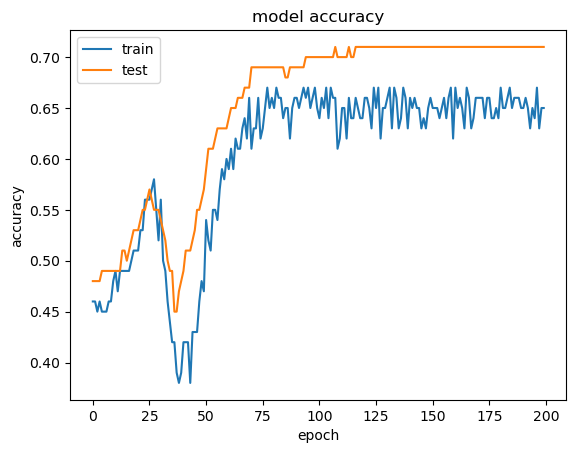

In [22]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

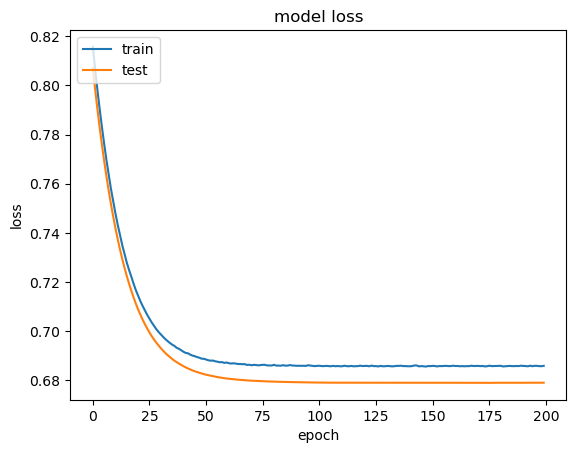

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


DNN

In [46]:
model = tf.keras.Sequential()
model.add(  tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))
model.add(  tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(
                optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[   tf.keras.metrics.BinaryAccuracy()   ]

             )

In [49]:
hist = model.fit(
                    X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs=150,
                    batch_size=1,
                    verbose=1

                )

Epoch 1/150
100/100 [==============================] - 1s 4ms/step - loss: 0.6626 - binary_accuracy: 0.5100 - val_loss: 0.6685 - val_binary_accuracy: 0.4800
Epoch 2/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6508 - binary_accuracy: 0.6000 - val_loss: 0.6615 - val_binary_accuracy: 0.5200
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6391 - binary_accuracy: 0.5800 - val_loss: 0.6547 - val_binary_accuracy: 0.5200
Epoch 4/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6301 - binary_accuracy: 0.5800 - val_loss: 0.6496 - val_binary_accuracy: 0.5400
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6225 - binary_accuracy: 0.5900 - val_loss: 0.6443 - val_binary_accuracy: 0.5400
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6151 - binary_accuracy: 0.5900 - val_loss: 0.6390 - val_binary_accuracy: 0.5700
Epoch 7/150
100/100 [==============================] - 0s 

Epoch 53/150
100/100 [==============================] - 0s 2ms/step - loss: 0.1070 - binary_accuracy: 0.9700 - val_loss: 0.1620 - val_binary_accuracy: 0.9100
Epoch 54/150
100/100 [==============================] - 0s 3ms/step - loss: 0.1045 - binary_accuracy: 0.9600 - val_loss: 0.1638 - val_binary_accuracy: 0.9400
Epoch 55/150
100/100 [==============================] - 0s 3ms/step - loss: 0.1012 - binary_accuracy: 0.9600 - val_loss: 0.1619 - val_binary_accuracy: 0.9400
Epoch 56/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0961 - binary_accuracy: 0.9700 - val_loss: 0.1587 - val_binary_accuracy: 0.9400
Epoch 57/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0969 - binary_accuracy: 0.9700 - val_loss: 0.1600 - val_binary_accuracy: 0.9400
Epoch 58/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0937 - binary_accuracy: 0.9700 - val_loss: 0.1661 - val_binary_accuracy: 0.9400
Epoch 59/150
100/100 [==============================

Epoch 105/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0507 - binary_accuracy: 0.9900 - val_loss: 0.0981 - val_binary_accuracy: 0.9700
Epoch 106/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0506 - binary_accuracy: 0.9900 - val_loss: 0.0993 - val_binary_accuracy: 0.9600
Epoch 107/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0433 - binary_accuracy: 1.0000 - val_loss: 0.0949 - val_binary_accuracy: 0.9600
Epoch 108/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0376 - binary_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9600
Epoch 109/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0485 - binary_accuracy: 0.9900 - val_loss: 0.1222 - val_binary_accuracy: 0.9300
Epoch 110/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0464 - binary_accuracy: 0.9900 - val_loss: 0.1195 - val_binary_accuracy: 0.9200
Epoch 111/150
100/100 [=======================

In [50]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


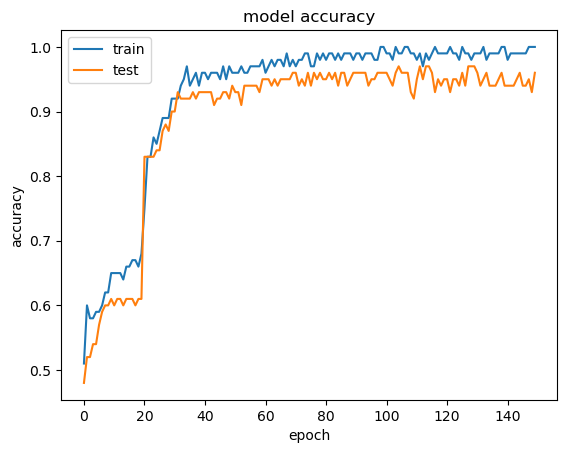

In [51]:
history = hist


# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

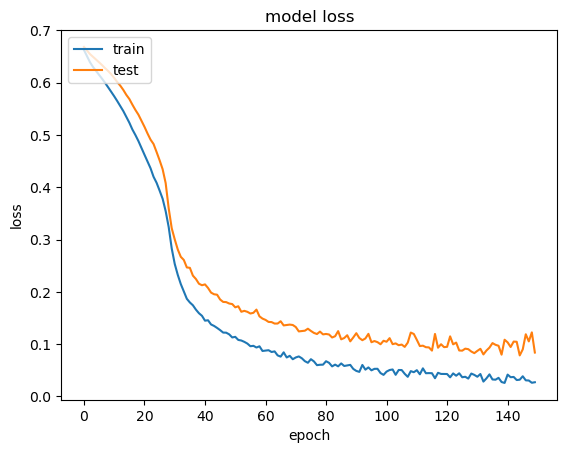

In [52]:
history = hist

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()